# CIFAR-10 Classification with PCA
This notebook implements classification on a subset of CIFAR-10 using PCA for dimensionality reduction and classifiers: SVM, Random Forest, and KNN.

## Import Libraries
We import essential libraries including `sklearn` for classification and `numpy` for data manipulation.

In [ ]:
# Import libraries
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Data Preprocessing
- Select only two classes (airplanes and automobiles)
- Reshape images into 1D feature vectors
- Normalize the data using StandardScaler
- Apply PCA to reduce dimensionality to 100 components

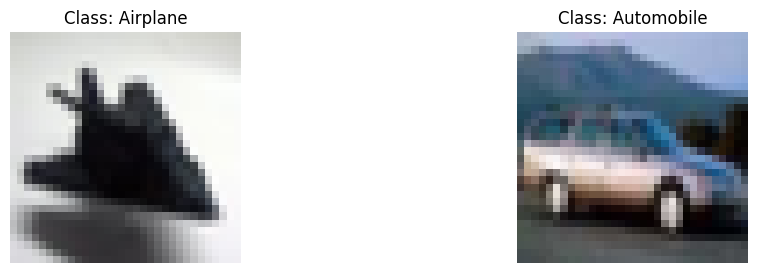

In [ ]:
# Define the class labels for the first four categories
first_two_classes = [0, 1]  # Airplane, Automobile

# Set up a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Loop through the first four classes
for i, class_label in enumerate(first_two_classes):
    # Find the index of the first image with the corresponding label
    index = np.where(y_train == class_label)[0][0]

    # Get the image and label
    image = x_train[index]
    label = class_label

    # Display the image
    axes[i].imshow(image)
    axes[i].set_title(f"Class: {['Airplane', 'Automobile'][label]}")
    axes[i].axis('off')  # Turn off axis for cleaner display

plt.show()

In [ ]:
import pandas as pd

# Convert to pandas DataFrame
x_train_df = pd.DataFrame(x_train.reshape(-1, 32 * 32 * 3))  # Flatten images to 1D array for DataFrame
y_train_df = pd.DataFrame(y_train)

# Check shape and head
print(x_train_df.shape)
print(x_train_df.head())

(50000, 3072)
   0     1     2     3     4     5     6     7     8     9     ...  3062  \
0    59    62    63    43    46    45    50    48    43    68  ...   104   
1   154   177   187   126   137   136   105   104    95   102  ...   136   
2   255   255   255   253   253   253   253   253   253   253  ...    79   
3    28    25    10    37    34    19    38    35    20    42  ...    38   
4   170   180   198   168   178   196   177   185   203   183  ...    78   

   3063  3064  3065  3066  3067  3068  3069  3070  3071  
0   216   184   140   151   118    84   123    92    72  
1   143   133   139   143   134   142   143   133   144  
2    78    85    83    79    85    83    80    86    84  
3    54    47    28    63    56    37    72    65    46  
4    75    79    82    71    75    78    73    77    80  

[5 rows x 3072 columns]


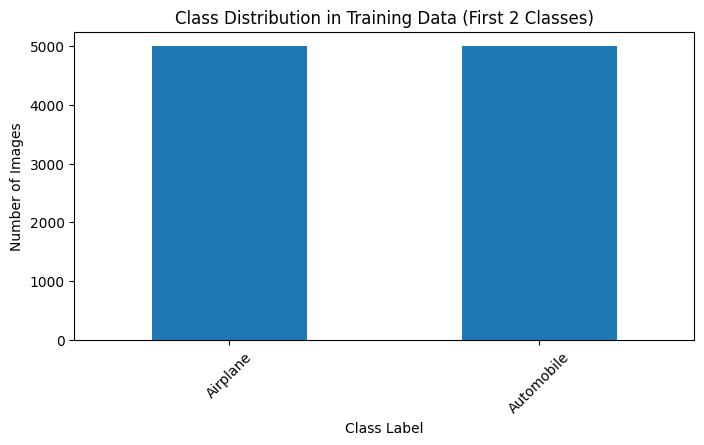

In [ ]:
import matplotlib.pyplot as plt

# Flatten the y_train to 1D array
y_train_flat = y_train.flatten()

# Filter out only the first two classes (Airplane, Automobile, Bird, Cat)
first_two_classes = [0, 1]  # Airplane, Automobile, Bird, Cat
filtered_y_train = [label for label in y_train_flat if label in first_two_classes]

# Plot the distribution of classes (only the first two categories)
plt.figure(figsize=(8, 4))
pd.Series(filtered_y_train).value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution in Training Data (First 2 Classes)')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.xticks(np.arange(2), ['Airplane', 'Automobile'], rotation=45)
plt.show()

## Train Models
We train three classifiers:
- **SVM (Support Vector Machine)**: A linear kernel SVM
- **Random Forest**: A tree-based ensemble model
- **KNN (K-Nearest Neighbors)**: A distance-based classifier

## Model Evaluation
We evaluate the classifiers using:
- **Accuracy**
- **Classification Reports**
- **Confusion Matrices**

## Overfitting Check
To assess overfitting, we randomly select 35% of the training data and measure accuracy on this subset.

## Training & Evaluation of Models (Standard Scaler + PCA)
This section performs the following steps:
- **Data Selection & Preprocessing:**
  - Filters only two classes (airplane & automobile).
  - Reshapes image data into 1D feature vectors.
  - Normalizes data using **StandardScaler**.
  - Reduces dimensionality using **PCA** (100 components).
- **Model Training:**
  - Trains **SVM (Support Vector Machine)**, **Random Forest**, and **KNN** on the PCA-transformed dataset.
- **Evaluation:**
  - Computes **classification reports**, **accuracy scores**, and **confusion matrices** for each model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select subset of classes (e.g., airplanes, cars)
selected_classes = [0, 1]  # airplane, automobile
train_mask = np.isin(y_train, selected_classes).flatten()
test_mask = np.isin(y_test, selected_classes).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# Preprocess data
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reduce dimensionality to 100 features
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(x_train_pca, y_train.ravel())
svm_predictions = svm_model.predict(x_test_pca)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model.fit(x_train_pca, y_train.ravel())
rf_predictions = rf_model.predict(x_test_pca)

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(x_train_pca, y_train.ravel())
knn_predictions = knn_model.predict(x_test_pca)

# Evaluate and compare
print("SVM Report:\n", classification_report(y_test, svm_predictions))
print("Random Forest Report:\n", classification_report(y_test, rf_predictions))
print("KNN Report:\n", classification_report(y_test, knn_predictions))

# Accuracy for SVM, Random Forest, and KNN
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Confusion Matrices
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

# Print evaluation metrics
print(f'SVM Accuracy: {svm_accuracy:.4f}')
print(f'RF Accuracy: {rf_accuracy:.4f}')
print(f'KNN Accuracy: {knn_accuracy:.4f}')
print('SVM Confusion Matrix:')
print(svm_conf_matrix)
print('RF Confusion Matrix:')
print(rf_conf_matrix)
print('KNN Confusion Matrix:')
print(knn_conf_matrix)


# --- for overfit check ---
# Randomly select 35% of the training data
sample_size = int(0.35 * len(x_train_pca))  # 35% of the total dataset
indices = np.random.choice(len(x_train_pca), sample_size, replace=False)  # Randomly pick indices

# Get the 35% subset of the data
x_train_sample = x_train_pca[indices]
y_train_sample = y_train[indices]

# SVM predictions on the 35% sample
svm_train_predictions_sample = svm_model.predict(x_train_sample)
svm_train_accuracy_sample = accuracy_score(y_train_sample, svm_train_predictions_sample)

# Random Forest predictions on the 35% sample
rf_train_predictions_sample = rf_model.predict(x_train_sample)
rf_train_accuracy_sample = accuracy_score(y_train_sample, rf_train_predictions_sample)

# KNN predictions on the 35% sample
knn_train_predictions_sample = knn_model.predict(x_train_sample)
knn_train_accuracy_sample = accuracy_score(y_train_sample, knn_train_predictions_sample)

# Print the accuracy for the 35% sample
print(f'SVM Accuracy on 35% sample: {svm_train_accuracy_sample:.4f}')
print(f'RF Accuracy on 35% sample: {rf_train_accuracy_sample:.4f}')
print(f'KNN Accuracy on 35% sample: {knn_train_accuracy_sample:.4f}')


SVM Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.84      0.81      0.82      1000

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

Random Forest Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.84      0.88      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

KNN Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.81      1000
           1       0.94      0.57      0.71      1000

    accuracy                           0.77      2000
   macro avg       0.82      0.77      0.76      2000
weighted avg       0.82  

## Data Preprocessing with Min-Max Scaling & Data Augmentation
This section introduces a different preprocessing approach:
- **Data Preprocessing:**
  - Uses **Min-Max Scaling** (rescales pixel values to [0,1]).
  - Reshapes images to their original 4D format (32x32x3).
  - Converts normalized data back to **uint8 format** for compatibility with OpenCV.
- **Data Augmentation:**
  - Uses **Keras' ImageDataGenerator** to apply:
    - Random **rotations**, **shifts**, **shear**, **zoom**, and **flips** to improve model generalization.
- **PCA-based Feature Extraction:**
  - Flattens images and applies **PCA** to retain 95% variance.
  - Shuffles the dataset and **splits it into training & validation sets (80-20)**.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

# Select subset of classes (e.g., airplanes, automobiles)
selected_classes = [0, 1]  # airplane, automobile
train_mask = np.isin(y_train, selected_classes).flatten()
test_mask = np.isin(y_test, selected_classes).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# Min-Max Scaling: Rescale pixel values to the range [0, 1]
x_train_minmax = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_test_minmax = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

# Reshape the training and test data to its original 4D shape (num_samples, 32, 32, 3)
x_train_reshaped = x_train_minmax.reshape(-1, 32, 32, 3)
x_test_reshaped = x_test_minmax.reshape(-1, 32, 32, 3)

# Convert the normalized data back to uint8 (0-255 range) for OpenCV compatibility
x_train_uint8 = (x_train_minmax * 255).astype(np.uint8)  # No need to flatten
x_test_uint8 = (x_test_minmax * 255).astype(np.uint8)    # No need to flatten

# Data Augmentation: Use Keras' ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation between -20 and 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2, # Randomly shift images vertically by up to 20%
    shear_range=0.2,        # Shear angle
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill in pixels that are created by shifting
)

# Fit the generator on the training data
datagen.fit(x_train_reshaped)

# PCA (Dimensionality Reduction): Flatten the images and apply PCA to reduce dimensions
x_train_flat = x_train_reshaped.reshape(x_train_reshaped.shape[0], -1)  # Flatten the images
x_test_flat = x_test_reshaped.reshape(x_test_reshaped.shape[0], -1)

# Apply PCA to reduce dimensionality (keeping 95% variance)
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Shuffle the training data to prevent overfitting
x_train_shuffled, y_train_shuffled = shuffle(x_train_minmax, y_train, random_state=42)

# Split the training data into training and validation sets (80-20 split)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_shuffled, y_train_shuffled, test_size=0.2, random_state=42)

# Shuffle the PCA data
x_train_pca_shuffled, y_train_shuffled_pca = shuffle(x_train_pca, y_train, random_state=42)

# Split the shuffled PCA data into training and validation sets
x_train_pca_split, x_val_pca_split, y_train_pca_split, y_val_pca_split = train_test_split(
    x_train_pca_shuffled, y_train_shuffled_pca, test_size=0.2, random_state=42
)

# Final Output: Preprocessed data
# For using PCA:
print(f"Training data shape (after PCA): {x_train_pca.shape}")
print(f"Test data shape (after PCA): {x_test_pca.shape}")

# For validation split:
print(f"Validation data shape: {x_val_split.shape}")


Training data shape (after PCA): (10000, 209)
Test data shape (after PCA): (2000, 209)
Validation data shape: (2000, 3072)


## Model Training & Evaluation (Min-Max Scaled + PCA Data)
This section follows a similar classification approach but with the **Min-Max Scaled + PCA-transformed dataset**:
- **Model Training:**
  - Trains **SVM**, **Random Forest**, and **KNN** on **PCA-reduced Min-Max Scaled data**.
- **Evaluation on Validation & Test Sets:**
  - Computes **classification reports**, **accuracy scores**, and **confusion matrices** for:
    - **Validation Data**
    - **Test Data**
- **Comparison with Previous Results:**
  - Helps determine whether Min-Max Scaling + PCA leads to different performance compared to StandardScaler + PCA.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train SVM on the PCA-transformed Min-Max scaled data
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(x_train_pca_split, y_train_pca_split.ravel())

# Train Random Forest on the PCA-transformed Min-Max scaled data
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model.fit(x_train_pca_split, y_train_pca_split.ravel())

# Train KNN on the PCA-transformed Min-Max scaled data
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(x_train_pca_split, y_train_pca_split.ravel())

# Predictions on validation data
svm_val_predictions = svm_model.predict(x_val_pca_split)
rf_val_predictions = rf_model.predict(x_val_pca_split)
knn_val_predictions = knn_model.predict(x_val_pca_split)

# Predictions on test data
svm_test_predictions = svm_model.predict(x_test_pca)
rf_test_predictions = rf_model.predict(x_test_pca)
knn_test_predictions = knn_model.predict(x_test_pca)

# Evaluate the models on the validation set
print("SVM Validation Report:\n", classification_report(y_val_pca_split, svm_val_predictions))
print("Random Forest Validation Report:\n", classification_report(y_val_pca_split, rf_val_predictions))
print("KNN Validation Report:\n", classification_report(y_val_pca_split, knn_val_predictions))

# Evaluate the models on the test set
print("SVM Test Report:\n", classification_report(y_test, svm_test_predictions))
print("Random Forest Test Report:\n", classification_report(y_test, rf_test_predictions))
print("KNN Test Report:\n", classification_report(y_test, knn_test_predictions))

# Accuracy on validation and test sets
svm_val_accuracy = accuracy_score(y_val_pca_split, svm_val_predictions)
rf_val_accuracy = accuracy_score(y_val_pca_split, rf_val_predictions)
knn_val_accuracy = accuracy_score(y_val_pca_split, knn_val_predictions)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)

print(f'SVM Validation Accuracy: {svm_val_accuracy:.4f}')
print(f'RF Validation Accuracy: {rf_val_accuracy:.4f}')
print(f'KNN Validation Accuracy: {knn_val_accuracy:.4f}')
print(f'SVM Test Accuracy: {svm_test_accuracy:.4f}')
print(f'RF Test Accuracy: {rf_test_accuracy:.4f}')
print(f'KNN Test Accuracy: {knn_test_accuracy:.4f}')

# Confusion Matrices
svm_val_conf_matrix = confusion_matrix(y_val_pca_split, svm_val_predictions)
rf_val_conf_matrix = confusion_matrix(y_val_pca_split, rf_val_predictions)
knn_val_conf_matrix = confusion_matrix(y_val_pca_split, knn_val_predictions)
svm_test_conf_matrix = confusion_matrix(y_test, svm_test_predictions)
rf_test_conf_matrix = confusion_matrix(y_test, rf_test_predictions)
knn_test_conf_matrix = confusion_matrix(y_test, knn_test_predictions)

print('SVM Validation Confusion Matrix:')
print(svm_val_conf_matrix)
print('RF Validation Confusion Matrix:')
print(rf_val_conf_matrix)
print('KNN Validation Confusion Matrix:')
print(knn_val_conf_matrix)
print('SVM Test Confusion Matrix:')
print(svm_test_conf_matrix)
print('RF Test Confusion Matrix:')
print(rf_test_conf_matrix)
print('KNN Test Confusion Matrix:')
print(knn_test_conf_matrix)


SVM Validation Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       984
           1       0.82      0.83      0.82      1016

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

Random Forest Validation Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       984
           1       0.84      0.89      0.86      1016

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

KNN Validation Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.77       984
           1       0.95      0.46      0.62      1016

    accuracy                           0.72      2000
   macro avg       0.79      0.72      0.70   

In [ ]:
# Summary of Each Approach:
# PCA with Min-Max Scaled Data: Apply PCA after the Min-Max scaling and use the transformed data for training.